# Simple Mnist

In [5]:
import random
import numpy as np
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

# For visualization
%matplotlib inline
import matplotlib.pyplot as plt

# Loading the data

In [6]:
# Import data
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


In [7]:
# Some information about the data
print("Training images: {}".format(len(mnist.train.images)))
print("Test images: {}".format(len(mnist.test.images)))
print("Shape images: {}".format(mnist.train.images[1].shape))
print("Shape labels: {}".format(mnist.train.labels[1].shape))

Training images: 55000
Test images: 10000
Shape images: (784,)
Shape labels: (10,)


Label: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


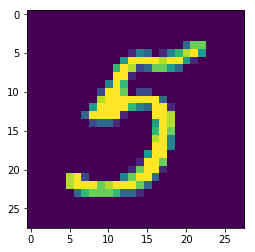

In [8]:
i = random.randint(0,len(mnist.train.images))
plot = plt.imshow(mnist.train.images[i].reshape(28,28))
print("Label: {}".format(mnist.train.labels[i]))      

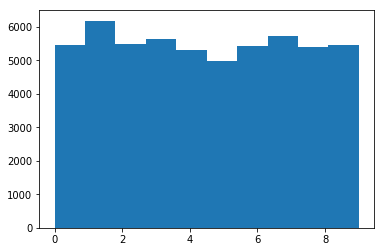

In [116]:
# Calculate distribution
sess = tf.InteractiveSession()
x = []
for i in mnist.train.labels:
    x.append(tf.argmax(i))
plt.hist(sess.run(x))
plt.show()

# Creating the model

In [9]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

In [10]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Training

In [11]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))

0.9203
